# Getting Started with GEDI L2B Version 2 Data in Python
### This tutorial demonstrates how to work with the Canopy Cover and Vertical Profile Metrics ([GEDI02_B.002](https://doi.org/10.5067/GEDI/GEDI02_B.002)) data product.
The Global Ecosystem Dynamics Investigation ([GEDI](https://lpdaac.usgs.gov/data/get-started-data/collection-overview/missions/gedi-overview/)) mission aims to characterize ecosystem structure and dynamics to enable radically improved quantification and understanding of the Earth's carbon cycle and biodiversity. The GEDI instrument produces high resolution laser ranging observations of the 3-dimensional structure of the Earth. GEDI is attached to the International Space Station and collects data globally between 51.6 N and 51.6 S latitudes at the highest resolution and densest sampling of any light detection and ranging (lidar) instrument in orbit to date. The Land Processes Distributed Active Archive Center (LP DAAC) distributes the GEDI Level 1 and Level 2 Version 1 and Version 2 products. The L1B and L2 GEDI products are archived and distributed in the HDF-EOS5 file format. 

---
## Use Case Example:  
This tutorial was developed using an example use case for a project being completed by the National Park Service. **The goal of the project is to use GEDI L2B Version 2 data to observe tree canopy height, cover, and profile over Redwood National Park in northern California.** 

This tutorial will show how to use Python to open GEDI L2B Version 2 files, visualize the sub-orbit of GEDI points (shots), subset to a region of interest, visualize GEDI canopy height and vertical profile metrics, and export subsets of GEDI science dataset (SDS) layers as GeoJSON files that can be loaded into GIS and/or Remote Sensing software programs. 

- [Redwood National Park GeoJSON](https://github.com/nasa/GEDI-Data-Resources/Additional_files/RedwoodNP.geojson)  
    - Contains the administrative boundary for Redwood National Park, available from: [Administrative Boundaries of National Park System Units 12/31/2017 - National Geospatial Data Asset (NGDA) NPS National Parks Dataset](https://irma.nps.gov/DataStore/DownloadFile/594958)

***    
### Data Used in the Example:  
- **GEDI L2B Canopy Cover and Vertical Profile Metrics Data Global Footprint Level - [GEDI02_B.002](https://doi.org/10.5067/GEDI/GEDI02_B.002)**  
     - _The purpose of the L2B dataset is to extract biophysical metrics from each GEDI waveform. These metrics are based on the directional gap probability profile derived from the L1B waveform and include canopy cover, Plant Area Index (PAI), Plant Area Volume Density (PAVD) and Foliage Height Diversity (FHD)._   
     - **Science Dataset (SDS) layers:**
        - /geolocation/digital_elevation_model
        - /geolocation/elev_lowestmode  
        - /geolocation/elev_highestreturn  
        - /geolocation/lat_lowestmode  
        - /geolocation/lon_lowestmode  
        - /rh100  
        - /l2b_quality_flag  
        - /degrade_flag  
        - /sensitivity  
        - /pai  
        - /pavd_z  
        - /geolocation/shot_number  
        - /dz  
        - /selected_l2a_algorithm
***  
# Topics Covered:
1. [**Get Started**](#getstarted)  
    1.1 Import Packages    
    1.2 Set Up the Working Environment and Retrieve Files      
2. [**Import and Interpret Data**](#importinterpret)      
    2.1 Open a GEDI HDF5 File and Read File Metadata     
    2.2 Read SDS Metadata and Subset by Beam   
3. [**Visualize a GEDI Sub-Orbit**](#visualizeorbit)      
    3.1 Subset by Layer and Create a Geodataframe   
    3.2 Visualize a Geodataframe
4. [**Work with GEDI L2B Data**](#L2B)        
    4.1 Import and Extract PAVD   
    4.2 Visualize PAVD    
5. [**Work with GEDI L2B Beam Transects**](#beamtransects)        
    5.1 Quality Filtering        
    5.2 Plot Beam Transects  
    5.3 Subset Beam Transects  
6. [**Plot Profile Transects**](#plottransects)      
    6.1 Plot PAVD Transects  
7. [**Spatial Visualization**](#spatialvisualization)      
    7.1 Import, Subset, and Quality Filter all Beams  
    7.2 Spatial Subsetting  
    7.3 Visualize All Beams: Canopy Height, Elevation, and PAI  
8. [**Export Subsets as GeoJSON Files**](#exportgeojson)     
       
***
# Before Starting this Tutorial:

This tutorial requires a compatible Python Environment and GEDI L2B granule from June 19, 2019 (orbit 02932, sub-orbit `02`) to download. To setup the Python environment and download the file, follow the steps in sections 1 and 2 of the [set-up instruction](https://github.com/nasa/GEDI-Data-Resources/Setup/setup_instructions.md).  

## Source Code used to Generate this Tutorial:
The repository containing all of the required files is located at: https://github.com/nasa/GEDI-Data-Resources      
  
<div class="alert alert-block alert-warning" >
<b>NOTE:</b> This tutorial was developed for GEDI L2B Version 2 HDF-EOS5 files and should only be used for that product. </div>   


---
# 1. Get Started <a id="getstarted"></a>

## 1.1 Import Packages <a id="1.1"></a>
#### Import the required packages and set the input/working directory to run this Jupyter Notebook locally.

/Users/titus/miniforge3/envs/carbon/lib/python3.10/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
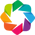

In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
import geoviews as gv
from geoviews import opts, tile_sources as gvts
import holoviews as hv
gv.extension('bokeh', 'matplotlib')
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

os.chdir('../../') 

## 1.2 Set Up the Working Environment and Retrieve Files<a id="1.2"></a>
#### The input directory is defined as the current working directory. Note that you will need to have the Jupyter Notebook and example data (.h5 and .geojson) stored in this directory in order to execute the tutorial successfully.

In [2]:
# inDir = os.getcwd()
inDir = "/Users/titus/BSU/remote_sensing/carbon_estimation/gedi/data/GEDI02_B_002_may21_to_july21"
inDir

'/Users/titus/BSU/remote_sensing/carbon_estimation/gedi/data/GEDI02_B_002_may21_to_july21'

#### You will need to download the file in order to execute this tutorial. Make sure to download the file into the `data` directory defined above.
### Direct Link to file:
 - https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/GEDI02_B.002/GEDI02_B_2019170155833_O02932_02_T02267_02_003_01_V002/GEDI02_B_2019170155833_O02932_02_T02267_02_003_01_V002.h5

Alternatively, you can use `earthaccess` package to download the data. 

In [3]:
# # !pip install earthaccess==0.8.2
# import earthaccess
# earthaccess.login(persist=True)
# results = ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/GEDI02_B.002/GEDI02_B_2019170155833_O02932_02_T02267_02_003_01_V002/GEDI02_B_2019170155833_O02932_02_T02267_02_003_01_V002.h5']
# # download 
# downloaded_files = earthaccess.download(
#     results,
#     local_path='data/',
# )

In [4]:
out_dir = "/Users/titus/BSU/remote_sensing/carbon_estimation/gedi/data/GEDI02_B_002_may21_to_july21/"
# gediFiles = [g for g in os.listdir('data/') if g.startswith('GEDI02_A') and g.endswith('.h5')]  # List GEDI L2A .h5 files in the inDir
gediFiles = [g for g in os.listdir(out_dir) if g.startswith('GEDI02_B') and g.endswith('.h5')]  # List GEDI L2A .h5 files in the inDir
gediFiles

['GEDI02_B_2021140075110_O13796_03_T06677_02_003_01_V002.h5',
 'GEDI02_B_2021185084021_O14494_02_T09795_02_003_01_V002.h5',
 'GEDI02_B_2021132105712_O13674_03_T00985_02_003_01_V002.h5',
 'GEDI02_B_2021128123009_O13613_03_T06830_02_003_01_V002.h5',
 'GEDI02_B_2021144061826_O13857_03_T07947_02_003_01_V002.h5']

---
# 2. Import and Interpret Data <a id="importinterpret"></a>

## 2.1 Open a GEDI HDF5 File and Read File Metadata <a id="2.1"></a>
#### Read the file using `h5py`. 

In [5]:
L2B = out_dir+f'{gediFiles[2]}'
L2B

'/Users/titus/BSU/remote_sensing/carbon_estimation/gedi/data/GEDI02_B_002_may21_to_july21/GEDI02_B_2021132105712_O13674_03_T00985_02_003_01_V002.h5'

#### The standard format  for GEDI Version 2 filenames is as follows:
> **GEDI02_B**: Product Short Name    
**2019170155833**: Julian Date and Time of Acquisition (YYYYDDDHHMMSS)  
**O02932**: Orbit Number   
**02**: Sub-Orbit Granule Number (1-4)  
**T02267**: Track Number (Reference Ground Track)   
**02**: Positioning and Pointing Determination System (PPDS) type (00 is predict, 01 rapid, 02 and higher is final)  
**003**: PGE Version Number    
**01**: Granule Production Version  
**V002**: Product Version  

#### Read in a GEDI HDF5 file using the `h5py` package.

In [6]:
gediL2B = h5py.File(L2B, 'r')  # Read file using h5py

#### Navigate the HDF5 file below. 

In [7]:
list(gediL2B.keys())

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011',
 'METADATA']

#### The GEDI HDF5 file contains groups in which data and metadata are stored.
#### First, the `METADATA` group contains the file-level metadata.

In [8]:
list(gediL2B['METADATA'])

['DatasetIdentification']

This contains useful information such as the creation date, PGEVersion, and VersionID. Below, print the file-level metadata attributes.

In [9]:
for g in gediL2B['METADATA']['DatasetIdentification'].attrs:
    print(g) 

PGEVersion
VersionID
abstract
characterSet
creationDate
credit
fileName
language
originatorOrganizationName
purpose
shortName
spatialRepresentationType
status
topicCategory
uuid


In [10]:
print(gediL2B['METADATA']['DatasetIdentification'].attrs['purpose'])

The purpose of the L2B dataset is to extract biophysical metrics from each GEDI waveform. These metrics are based on the directional gap probability profile derived from the L1B waveform and include canopy cover, Plant Area Index (PAI), Plant Area Volume Density (PAVD) and Foliage Height Diversity (FHD).


## 2.2 Read SDS Metadata and Subset by Beam <a id="2.2"></a>

####  The GEDI instrument consists of 3 lasers producing a total of 8 beam ground transects. The eight remaining groups contain data for each of the eight GEDI beam transects. For additional information, be sure to check out: https://gedi.umd.edu/instrument/specifications/.

In [11]:
beamNames = [g for g in gediL2B.keys() if g.startswith('BEAM')]
beamNames

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011']

#### One useful piece of metadata to retrieve from each beam transect is whether it is a full power beam or a coverage beam. 

In [12]:
for g in gediL2B['BEAM0000'].attrs: print(g)

description
wp-l2-l2b_githash
wp-l2-l2b_version


In [13]:
for b in beamNames: 
    print(f"{b} is a {gediL2B[b].attrs['description']}")

BEAM0000 is a Coverage beam
BEAM0001 is a Coverage beam
BEAM0010 is a Coverage beam
BEAM0011 is a Coverage beam
BEAM0101 is a Full power beam
BEAM0110 is a Full power beam
BEAM1000 is a Full power beam
BEAM1011 is a Full power beam


#### Below, pick one of the full power beams that will be used to retrieve GEDI L2B shots in Section 3. 

In [14]:
beamNames = ['BEAM0110']

#### Identify all the objects in the GEDI HDF5 file below. 
Note: This step may take a while to complete.

In [15]:
gediL2B_objs = []
gediL2B.visit(gediL2B_objs.append)                                           # Retrieve list of datasets
gediSDS = [o for o in gediL2B_objs if isinstance(gediL2B[o], h5py.Dataset)]  # Search for relevant SDS inside data file
[i for i in gediSDS if beamNames[0] in i][:10]                               # Print the first 10 datasets for selected beam

['BEAM0110/algorithmrun_flag',
 'BEAM0110/ancillary/dz',
 'BEAM0110/ancillary/l2a_alg_count',
 'BEAM0110/ancillary/maxheight_cuttoff',
 'BEAM0110/ancillary/rg_eg_constraint_center_buffer',
 'BEAM0110/ancillary/rg_eg_mpfit_max_func_evals',
 'BEAM0110/ancillary/rg_eg_mpfit_maxiters',
 'BEAM0110/ancillary/rg_eg_mpfit_tolerance',
 'BEAM0110/ancillary/signal_search_buff',
 'BEAM0110/ancillary/tx_noise_stddev_multiplier']

---
# 3. Visualize a GEDI Orbit <a id="visualizeorbit"></a>
#### In the section below, import GEDI L2B SDS layers into a `GeoPandas` GeoDataFrame for the beam specified above. 
#### Use the `lat_lowestmode` and `lon_lowestmode` to create a `shapely` point for each GEDI shot location. 

## 3.1 Subset by Layer and Create a Geodataframe <a id="3.1"></a>

#### Read in the SDS and take a representative sample (every 100th shot) and append to lists, then use the lists to generate a `pandas` dataframe.

In [16]:
lonSample, latSample, shotSample, qualitySample, beamSample = [], [], [], [], []  # Set up lists to store data

# Open the SDS
lats = gediL2B[f'{beamNames[0]}/geolocation/lat_lowestmode'][()]
lons = gediL2B[f'{beamNames[0]}/geolocation/lon_lowestmode'][()]
shots = gediL2B[f'{beamNames[0]}/geolocation/shot_number'][()]
quality = gediL2B[f'{beamNames[0]}/l2b_quality_flag'][()]

# Take every 100th shot and append to list
for i in range(len(shots)):
    if i % 100 == 0:
        shotSample.append(str(shots[i]))
        lonSample.append(lons[i])
        latSample.append(lats[i])
        qualitySample.append(quality[i])
        beamSample.append(beamNames[0])
            
# Write all of the sample shots to a dataframe
latslons = pd.DataFrame({'Beam': beamSample, 'Shot Number': shotSample, 'Longitude': lonSample, 'Latitude': latSample,
                         'Quality Flag': qualitySample})
latslons

Beam         Shot Number   Longitude   Latitude  Quality Flag
0     BEAM0110  136740600300482000 -155.228271  51.776060             0
1     BEAM0110  136740600300482100 -155.186985  51.775314             0
2     BEAM0110  136740600300482200 -155.145709  51.774581             0
3     BEAM0110  136740600300482300 -155.104525  51.773823             0
4     BEAM0110  136740600300482400 -155.061567  51.773009             0
...        ...                 ...         ...        ...           ...
1690  BEAM0110  136740600300651000  -73.345728   0.399772             0
1691  BEAM0110  136740600300651100  -73.316075   0.357696             0
1692  BEAM0110  136740600300651200  -73.286458   0.315636             0
1693  BEAM0110  136740600300651300  -73.256224   0.272682             0
1694  BEAM0110  136740600300651400  -73.225979   0.229741             0

[1695 rows x 5 columns]

#### Above is a dataframe containing columns describing the beam, shot number, lat/lon location, and quality information about each shot.

In [17]:
# Clean up variables that will no longer be needed
del beamSample, quality, qualitySample, gediL2B_objs, latSample, lats, lonSample, lons, shotSample, shots 

#### Below, create an additional column called 'geometry' that contains a `shapely` point generated from each lat/lon location from the shot. 

In [18]:
# Take the lat/lon dataframe and convert each lat/lon to a shapely point
latslons['geometry'] = latslons.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

#### Next, convert to a `Geopandas` GeoDataFrame.

In [19]:
# Convert to a Geodataframe
latslons = gp.GeoDataFrame(latslons)
latslons = latslons.drop(columns=['Latitude','Longitude'])
latslons['geometry']

0       POINT (-155.22827 51.77606)
1       POINT (-155.18699 51.77531)
2       POINT (-155.14571 51.77458)
3       POINT (-155.10452 51.77382)
4       POINT (-155.06157 51.77301)
                   ...             
1690      POINT (-73.34573 0.39977)
1691       POINT (-73.31607 0.3577)
1692      POINT (-73.28646 0.31564)
1693      POINT (-73.25622 0.27268)
1694      POINT (-73.22598 0.22974)
Name: geometry, Length: 1695, dtype: geometry

#### Pull out and plot an example `shapely` point below.

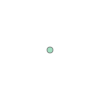

In [20]:
latslons['geometry'][0]

## 3.2 Visualize a GeoDataFrame <a id="3.2"></a>
#### In this section, use the GeoDataFrame and the `geoviews` python package to spatially visualize the location of the GEDI shots on a basemap and import a GeoJSON file of the spatial region of interest for the use case example: Redwood National Park.

In [21]:
# Define a function for visualizing GEDI points
def pointVisual(features, vdims):
    return (gvts.EsriImagery * gv.Points(features, vdims=vdims).options(tools=['hover'], height=500, width=900, size=5, 
                                                                        color='yellow', fontsize={'xticks': 10, 'yticks': 10, 
                                                                                                  'xlabel':16, 'ylabel': 16}))

#### Import a GeoJSON of Redwood National Park as an additional GeoDataFrame. Note that you will need to have downloaded the [GeoJSON](https://git.earthdata.nasa.gov/projects/LPDUR/repos/gedi-v2-tutorials/browse/RedwoodNP.geojson) from the bitbucket repo containing this tutorial and have it saved in the same directory as this Jupyter Notebook.

In [22]:
rcew = gp.GeoDataFrame.from_file('/Users/titus/BSU/remote_sensing/tutorials/icesat2/karina/RCEW-outline_WGS84_simple.geojson') # Import GeoJSON as GeoDataFrame

In [23]:
rcew

geometry
0  POLYGON ((-116.799 43.06089, -116.7954 43.0608...

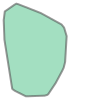

In [24]:
rcew['geometry'][0]  # Plot GeoDataFrame

#### Defining the vdims below will allow you to hover over specific shots and view information about them.

In [25]:
# Create a list of geodataframe columns to be included as attributes in the output map
vdims = []
for f in latslons:
    if f not in ['geometry']:
        vdims.append(f)
vdims

['Beam', 'Shot Number', 'Quality Flag']

#### Below, combine a plot of the Redwood National Park Boundary (combine two `geoviews` plots using `*`) with the point visual mapping function defined above in order to plot (1) the representative GEDI shots, (2) the region of interest, and (3) a basemap layer. 

In [26]:
# Call the function for plotting the GEDI points
gv.Polygons(rcew['geometry']).opts(line_color='red', color=None) * pointVisual(latslons, vdims = vdims)

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (Beam,Shot Number,Quality Flag)

#### Above is a good illustration of the new GEDI _Version 2_ sub-orbit granules (remember that GEDI _Version 1_  files are stored as one ISS orbit). One of the benefits of using geoviews is the interactive nature of the output plots. Use the tools to the right of the map above to zoom in and find the shots intersecting Redwood National Park. 
> (**HINT**: find where the orbit intersects the west coast of the United States)

#### Below is a screenshot of the region of interest:

<!-- ![GEDI_L2B_V2_Tutorial_1.png](../../img/GEDI_L2B_V2_Tutorial_1.png "Sample of GEDI L1B shots in yellow (orbit 2932) plotted over Redwood National Park, USA.") -->

#### Side Note: Wondering what the 0's and 1's for `l2b_quality_flag` mean?

In [27]:
print(f"Quality Flag: {gediL2B[b]['l2b_quality_flag'].attrs['description']}")

Quality Flag: Flag simpilfying selection of most useful data for Level 2B


#### Above, 0 is poor quality and a quality_flag value of 1 indicates the laser shot meets criteria based on energy, sensitivity, amplitude, and real-time surface tracking quality. We will show an example of how to quality filter GEDI data in section 5.1.
#### After finding one of the shots within Redwood NP, find the index for that shot number so that we can find the correct shot to visualize in Section 4. 

#### Each GEDI shot has a unique shot identifier (shot number) that is available within each data group of the product. The shot number is important to retain in any data subsetting as it will allow the user to link any shot record back to the original orbit data, and to link any shot and its data between the L1 and L2 products. The standard format  for GEDI Shots is as follows:

### Shot: 29320600200465601
> **2932**: Orbit Number      
**06**: Beam Number    
**0**: Reserved for future use     
**02**: Sub-orbit Granule Number    
**004**: Minor frame number   
**65601**: Shot index  

In [28]:
del latslons  # No longer need the geodataframe used to visualize the full GEDI orbit

---
# 4. Work with GEDI L2B Data <a id="L2B"></a>
#### The L2B product contains biophysical information derived from the geolocated GEDI return waveforms including total and vertical profiles of canopy cover and Plant Area Index (PAI), the vertical Plant Area Volume Density (PAVD) profile, and Foliage Height Diversity (FHD).
Detailed product information can be found on the [GEDI L2B Product Page](https://doi.org/10.5067/GEDI/GEDI02_B.002).

## 4.1 Import and Extract Specific Shots
#### Notice that there are over a thousand datasets available in the GEDI L2B product. In the code blocks below, you will subset to just a few of the datasets available.
#### In this section, learn how to extract and subset specific shots and plot Plant Area Volume Density (PAVD) using `holoviews`. 

In [29]:
len(gediSDS)

1576

In [30]:
beamNames

['BEAM0110']

In [31]:
beamSDS = [g for g in gediSDS if beamNames[0] in g]  # Subset to a single beam
len(beamSDS)

197

### We will set the shot index used as an example from the [GEDI L1B Tutorial](https://git.earthdata.nasa.gov/projects/LPDUR/repos/gedi-v2-tutorials/browse/GEDI_L1B_V2_Tutorial.ipynb) and [GEDI L2A Tutorial](https://git.earthdata.nasa.gov/projects/LPDUR/repos/gedi-v2-tutorials/browse/GEDI_L2A_V2_Tutorial.ipynb) to show how to subset a single shot of GEDI L2B data.

In [32]:
# shot = 29320600200465601
shot = 136740600300539400

In [33]:
index = np.where(gediL2B[f'{beamNames[0]}/shot_number'][()]==shot)[0][0]  # Set the index for the shot identified above
index = int(index)
index

57400

## 4.2 Visualize PAVD
#### In section 4.2, import the PAVD metrics (`pavd_z`) and begin exploring how to plot them.

In [34]:
pavd = gediL2B[[g for g in beamSDS if g.endswith('/pavd_z')][0]]  # PAVD

#### Print the description for the PAVD dataset.

In [35]:
print(f"Plant Area Volume Density is {pavd.attrs['description']}")

Plant Area Volume Density is Vertical Plant Area Volume Density profile with a vertical step size of dZ


#### Below, open the `dz` layer in order to define the correct vertical step size.

In [36]:
# Grab vertical step size 
dz = gediL2B[f'{beamNames[0]}/ancillary/dz'][0]
dz

np.float64(5.0)

#### So the vertical step size is 5.0 meters.

In [37]:
print(f"The shape of PAVD is {pavd.shape}.")

The shape of PAVD is (169462, 30).


#### And it looks like PAVD includes 30 "steps" in each shot, describing the PAVD at height = step # * `dz`.
#### Now, bring in other useful L2B datasets such as `elev_lowestmode`, `lat_lowestmode` and `lon_lowestmode`.

In [38]:
# Bring in the desired SDS
elev = gediL2B[f'{beamNames[0]}/geolocation/elev_lowestmode'][()]  # Latitude
lats = gediL2B[f'{beamNames[0]}/geolocation/lat_lowestmode'][()]  # Latitude
lons = gediL2B[f'{beamNames[0]}/geolocation/lon_lowestmode'][()]  # Longitude

#### Grab the location, elevation, and PAVD metrics for the shot defined above:

In [39]:
shotElev = elev[index]
shotLat = lats[index]
shotLon = lons[index]
shotPAVD = pavd[index]

#### Put everything together to identify the shot that we want to extract:

In [40]:
print(f"The shot is located at: {str(shotLat)}, {str(shotLon)} (shot ID: {shot}, index {index}) and is from {beamNames[0]}.")

The shot is located at: 43.20662896150051, -116.78376294451456 (shot ID: 136740600300539400, index 57400) and is from BEAM0110.


#### Next, reformat PAVD into a list of tuples containing each PAVD value and height.

In [41]:
pavdAll = []
pavdElev = []

for i, e in enumerate(range(len(shotPAVD))):
    if shotPAVD[i] > 0:
        pavdElev.append((shot, shotElev + dz * i, shotPAVD[i]))  # Append tuple of shot number, elevation, and PAVD
pavdAll.append(pavdElev)                                         # Append to final list

#### Below, plot each shot by using `holoviews` Path() function, with the PAVD plotted in the third dimension in shades of green.

In [42]:
path1 = hv.Path(pavdAll, vdims='PAVD').options(color='PAVD', clim=(0,0.1), cmap='Greens', line_width=20, colorbar=True, 
                                               width=700, height=550, clabel='PAVD', xlabel='Shot Number', 
                                               ylabel='Elevation (m)', fontsize={'title':16, 'xlabel':16, 'ylabel': 16,
                                                                                 'xticks':12, 'yticks':12, 
                                                                                 'clabel':12, 'cticks':10})
path1

:Path   [x,y]   (PAVD)

### Congratulations! You have plotted your first PAVD profile.

---
# 5. Work with GEDI L2B Beam Transects<a id="beamtransects"></a>
#### Next, import a number of desired SDS layers for BEAM0110 (for the entire orbit) and create a `pandas` Dataframe to store the arrays.

In [43]:
# Open all of the desired SDS
dem = gediL2B[[g for g in beamSDS if g.endswith('/digital_elevation_model')][0]][()]
zElevation = gediL2B[[g for g in beamSDS if g.endswith('/elev_lowestmode')][0]][()]
zHigh = gediL2B[[g for g in beamSDS if g.endswith('/elev_highestreturn')][0]][()]
zLat = gediL2B[[g for g in beamSDS if g.endswith('/lat_lowestmode')][0]][()]
zLon = gediL2B[[g for g in beamSDS if g.endswith('/lon_lowestmode')][0]][()]
canopyHeight = gediL2B[[g for g in beamSDS if g.endswith('/rh100')][0]][()]
quality = gediL2B[[g for g in beamSDS if g.endswith('/l2b_quality_flag')][0]][()]
degrade = gediL2B[[g for g in beamSDS if g.endswith('/degrade_flag')][0]][()]
sensitivity = gediL2B[[g for g in beamSDS if g.endswith('/sensitivity')][0]][()]
pavd = gediL2B[f'{beamNames[0]}/pavd_z'][()]
shotNums = gediL2B[f'{beamNames[0]}/shot_number'][()]
selectedAlgorithmL2A = gediL2B[[g for g in beamSDS if g.endswith('/selected_l2a_algorithm')][0]][()]

# Create a shot index
shotIndex = np.arange(shotNums.size)

#### In the GEDI L2B product, Canopy Height is stored in units (cm), so below convert to meters.

In [44]:
canopyHeight = canopyHeight / 100  # Convert RH100 from cm to m 

#### As mentioned in the sections above, Plant Area Volume Density (pavd) is defined as the _Vertical Plant Area Volume Density profile with a vertical step size of dZ_. Below, reformat the shape of the PAVD layer in order to add it to the dataframe below.

In [45]:
print(f"The shape of Canopy Height is {canopyHeight.shape} vs. the shape of PAVD, which is {pavd.shape}.")

The shape of Canopy Height is (169462,) vs. the shape of PAVD, which is (169462, 30).


#### Above, notice that unlike a SDS layer like Canopy Height, which has a single value for each shot, PAVD has 30 values (representing different vertical heights) for each shot.
#### Below, reformat the data into a list of values for each shot. 

In [46]:
# Set up an empty list to append to 
pavdA = []
for i in range(len(pavd)):
    
    # If any of the values are fill value, set to nan
    pavdF = [np.nan]
    for p in range(len(pavd[i])):
        if pavd[i][p]!= -9999:
            pavdF.append(pavd[i][p])  # If the value is not fill value, append to list
    pavdA.append(pavdF)               # Append back to master list

#### Note: The cell above may take up to a minute to process.

#### Below, notice the reformatted PAVD layer, which should now fit into the dataframe created below.

In [47]:
len(pavdA)

169462

In [48]:
# Take the DEM, GEDI-produced Elevation, and Canopy height and add to a Pandas dataframe
transectDF = pd.DataFrame({
    'Shot Index': shotIndex,
    'Shot Number': shotNums,
    'Latitude': zLat,
    'Longitude': zLon,
    'Tandem-X DEM': dem,
    'Elevation (m)': zElevation,
    'Canopy Elevation (m)': zHigh,
    'Canopy Height (rh100)': canopyHeight,
    'Quality Flag': quality,
    'Degrade Flag': degrade, 
    'Plant Area Volume Density': pavdA,
    'Sensitivity': sensitivity,
    'Selected L2A Algorithm': selectedAlgorithmL2A
    })

In [49]:
transectDF

Shot Index         Shot Number   Latitude   Longitude   Tandem-X DEM  \
0                0  136740600300482000  51.776060 -155.228271 -999999.000000   
1                1  136740600300482001  51.776052 -155.227858 -999999.000000   
2                2  136740600300482002  51.776045 -155.227445 -999999.000000   
3                3  136740600300482003  51.776038 -155.227032 -999999.000000   
4                4  136740600300482004  51.776030 -155.226619 -999999.000000   
...            ...                 ...        ...         ...            ...   
169457      169457  136740600300651457   0.204925  -73.208510     226.391922   
169458      169458  136740600300651458   0.204482  -73.208220     231.300339   
169459      169459  136740600300651459   0.204055  -73.207926     231.300339   
169460      169460  136740600300651460   0.203652  -73.207623     236.110779   
169461      169461  136740600300651461   0.203231  -73.207326     236.110779   

        Elevation (m)  Canopy Elevation (m)  Canopy Height (rh100)  \
0         5683.647461           5683.647461                   0.00   
1         5683.656250           5683.656250                   0.00   
2         5683.665039           5683.665039                   0.00   
3         5683.674316           5683.674316                   0.00   
4         5683.683105           5683.683105                   0.00   
...               ...                   ...                    ...   
169457    7756.708496           7756.708496                   0.00   
169458    7703.670410           7721.224121                  17.54   
169459    7689.134766           7691.604980                   2.47   
169460    7733.938965           7733.938965                   0.00   
169461    7734.062500           7734.062500                   0.00   

        Quality Flag  Degrade Flag Plant Area Volume Density  Sensitivity  \
0                  0             0                     [nan]     4.425515   
1                  0             0                     [nan]     8.071312   
2                  0             0                     [nan]  -122.925842   
3                  0             0                     [nan]   -91.204468   
4                  0             0                     [nan]     5.511496   
...              ...           ...                       ...          ...   
169457             0            70                     [nan]     0.873922   
169458             0            70                     [nan]     0.954197   
169459             0            70                     [nan]     0.971515   
169460             0            70                     [nan]     0.866685   
169461             0            70                     [nan]     0.880782   

        Selected L2A Algorithm  
0                            1  
1                            1  
2                            1  
3                            1  
4                            1  
...                        ...  
169457                       1  
169458                       2  
169459                       2  
169460                       1  
169461                       1  

[169462 rows x 13 columns]

#### Notice the unusual values listed above--those shots are flagged as poor quality and will be removed in Section 5.1.
#### Now that you have the desired SDS into a `pandas` dataframe, begin plotting the entire beam transect:

In [50]:
# Plot Canopy Height
canopyVis = hv.Scatter((transectDF['Shot Index'], transectDF['Canopy Height (rh100)']))
canopyVis.opts(color='darkgreen', height=500, width=900, title=f'GEDI L2B Full Transect {beamNames[0]}',
               fontsize={'title':16, 'xlabel':16, 'ylabel': 16}, size=0.1, xlabel='Shot Index', ylabel='Canopy Height (m)')

:Scatter   [x]   (y)

#### Congratulations! You have plotted your first GEDI sub-orbit beam transect. Notice above that things look a little messy--before we dive deeper into plotting full transects, let's quality filter the shots in the section below.

In [51]:
del canopyVis, canopyHeight, degrade, dem, pavd, pavdA, quality, sensitivity, shotIndex, shotNums, zElevation, zHigh, zLat, zLon, selectedAlgorithmL2A

## 5.1 Quality Filtering
#### Now that you have the desired layers imported as a dataframe for the entire beam transect, let's perform quality filtering.
#### Below, remove any shots where the `l2b_quality_flag` is set to 0 by defining those shots as `nan`. 
#### The syntax of the line below can be read as: in the dataframe, find the rows "where" the quality flag is not equal (ne) to 0. If a row (shot) does not meet the condition, set all values equal to `nan` for that row.

In [52]:
transectDF = transectDF.where(transectDF['Quality Flag'].ne(0))  # Set any poor quality returns to NaN

In [53]:
transectDF

Shot Index  Shot Number  Latitude  Longitude  Tandem-X DEM  \
0              NaN          NaN       NaN        NaN           NaN   
1              NaN          NaN       NaN        NaN           NaN   
2              NaN          NaN       NaN        NaN           NaN   
3              NaN          NaN       NaN        NaN           NaN   
4              NaN          NaN       NaN        NaN           NaN   
...            ...          ...       ...        ...           ...   
169457         NaN          NaN       NaN        NaN           NaN   
169458         NaN          NaN       NaN        NaN           NaN   
169459         NaN          NaN       NaN        NaN           NaN   
169460         NaN          NaN       NaN        NaN           NaN   
169461         NaN          NaN       NaN        NaN           NaN   

        Elevation (m)  Canopy Elevation (m)  Canopy Height (rh100)  \
0                 NaN                   NaN                    NaN   
1                 NaN                   NaN                    NaN   
2                 NaN                   NaN                    NaN   
3                 NaN                   NaN                    NaN   
4                 NaN                   NaN                    NaN   
...               ...                   ...                    ...   
169457            NaN                   NaN                    NaN   
169458            NaN                   NaN                    NaN   
169459            NaN                   NaN                    NaN   
169460            NaN                   NaN                    NaN   
169461            NaN                   NaN                    NaN   

        Quality Flag  Degrade Flag Plant Area Volume Density  Sensitivity  \
0                NaN           NaN                       NaN          NaN   
1                NaN           NaN                       NaN          NaN   
2                NaN           NaN                       NaN          NaN   
3                NaN           NaN                       NaN          NaN   
4                NaN           NaN                       NaN          NaN   
...              ...           ...                       ...          ...   
169457           NaN           NaN                       NaN          NaN   
169458           NaN           NaN                       NaN          NaN   
169459           NaN           NaN                       NaN          NaN   
169460           NaN           NaN                       NaN          NaN   
169461           NaN           NaN                       NaN          NaN   

        Selected L2A Algorithm  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
...                        ...  
169457                     NaN  
169458                     NaN  
169459                     NaN  
169460                     NaN  
169461                     NaN  

[169462 rows x 13 columns]

#### Below, quality filter even further by using the `degrade_flag` (Greater than zero if the shot occurs during a degrade period, zero otherwise) and the `Sensitivity` layer, using a threshold of 0.95.

In [54]:
transectDF = transectDF.where(transectDF['Degrade Flag'] < 1)
transectDF = transectDF.where(transectDF['Sensitivity'] > 0.95)

#### Below, drop all of the shots that did not pass the quality filtering standards outlined above from the `transectDF`.

In [55]:
transectDF = transectDF.dropna()  # Drop all of the rows (shots) that did not pass the quality filtering above

In [56]:
print(f"Quality filtering complete, {len(transectDF)} high quality shots remaining.")

Quality filtering complete, 30011 high quality shots remaining.


## 5.2 Plot Beam Transects
#### Next, plot the full remaining transect of high quality values using `holoviews` Scatter(). Combine the Tandem-X derived elevation, the GEDI-derived elevation, and the Canopy Top Elevation in a combined holoviews plot.

In [57]:
# Plot Digital Elevation Model
demVis = hv.Scatter((transectDF['Shot Index'], transectDF['Tandem-X DEM']), label='Tandem-X DEM')
demVis = demVis.opts(color='black', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5)

In [58]:
# Plot GEDI-Retrieved Elevation
zVis = hv.Scatter((transectDF['Shot Index'], transectDF['Elevation (m)']), label='GEDI-derived Elevation')
zVis = zVis.opts(color='saddlebrown', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5)

In [59]:
# Plot Canopy Top Elevation
rhVis = hv.Scatter((transectDF['Shot Index'], transectDF['Canopy Elevation (m)']), label='Canopy Top Elevation')
rhVis = rhVis.opts(color='darkgreen', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5, 
                   tools=['hover'], xlabel='Shot Index', ylabel='Elevation (m)')

In [60]:
# Combine all three scatterplots
(demVis * zVis * rhVis).opts(show_legend=True, legend_position='bottom_right',fontsize={'title':14, 'xlabel':16, 'ylabel': 16}, 
                             title=f'{beamNames[0]} Full Transect: {L2B.split(".")[0]}')

:Overlay
   .Scatter.Tandem_hyphen_minus_X_DEM           :Scatter   [x]   (y)
   .Scatter.GEDI_hyphen_minus_derived_Elevation :Scatter   [x]   (y)
   .Scatter.Canopy_Top_Elevation                :Scatter   [x]   (y)

#### The plot still looks a bit messy this far zoomed out--feel free to pan, zoom, and explore different areas of the plot. The waveforms plotted in section 4 were 46597-46600. If you zoom into the high-quality shots between 4.000e+5 and 5.000e+5, you will find the portion of the transect intersecting Redwood National Park, seen below:
<!-- ![GEDI_L2B_V2_Tutorial_2.png](../../img/GEDI_L2B_V2_Tutorial_2.png "BEAM0110 Transect Plot of Tandem-X Elevation, GEDI-derived Elevation, and Canopy Top Elevation over Redwood National Park, USA.") -->

## 5.3 Subset Beam Transects

#### Now, subset down to a smaller transect centered on the shot analyzed in the sections above.

In [61]:
print(index)

57400


In [62]:
# Grab 50 points before and after the shot visualized above
start = index - 50
end = index + 50 

In [63]:
# print(f"The transect begins at ({transectDF['Latitude'][start]}, {transectDF['Longitude'][start]}) and ends at ({transectDF['Latitude'][end]}, {transectDF['Longitude'][end]}).")

#### Below, subset the transect using `.loc`.

In [64]:
transectDF = transectDF.loc[start:end]  # Subset the Dataframe to only the selected region of interest over Redwood NP

---
# 6. Plot Profile Transects <a id="plottransects"></a>
#### In this section, plot the transect subset using elevation, canopy height, and plant area volume density (PAVD) metrics.

#### In order to get an idea of the length of the beam transect that you are plotting, you can plot the x-axis as distance, which is calculated below.

In [65]:
# Calculate along-track distance
distance = np.arange(0.0, len(transectDF.index) * 60, 60)  # GEDI Shots are spaced 60 m apart
transectDF['Distance'] = distance                          # Add Distance as a new column in the dataframe

## 6.1 Plot PAVD Transects

#### Similar to what was done with PAVD in the sections above, reformat PAVD into a list of tuples containing each PAVD value and height by shot.

In [66]:
pavdAll = []
for j, s in enumerate(transectDF.index):
    pavdShot = transectDF['Plant Area Volume Density'][s]
    elevShot = transectDF['Elevation (m)'][s]
    pavdElev = []
    
    # Remove fill values
    if np.isnan(pavdShot).all():
        continue
    else:
        del pavdShot[0]
    for i, e in enumerate(range(len(pavdShot))):
        if pavdShot[i] > 0:
            pavdElev.append((distance[j], elevShot + dz * i, pavdShot[i]))  # Append tuple of distance, elevation, and PAVD
    pavdAll.append(pavdElev)                                                # Append to final list

In [67]:
canopyElevation = [p[-1][1] for p in pavdAll]  # Grab the canopy elevation by selecting the last value in each PAVD

#### Below, plot each shot by using `holoviews` Path() function, with the PAVD plotted in the third dimension in shades of green.

In [68]:
path1 = hv.Path(pavdAll, vdims='PAVD').options(color='PAVD', clim=(0,0.3), cmap='Greens', line_width=8, colorbar=True, 
                                               width=950, height=500, clabel='PAVD', xlabel='Distance Along Transect (m)',
                                               ylabel='Elevation (m)', fontsize={'title':16, 'xlabel':16, 'ylabel': 16,
                                                                                 'xticks':12, 'yticks':12, 
                                                                                 'clabel':12, 'cticks':10})
path1

:Path   [x,y]   (PAVD)

#### Add in the ground elevation and canopy top elevation for better context as to where in the canopy the highest PAVD exists.

In [69]:
path2 = hv.Curve((distance, transectDF['Elevation (m)']), label='Ground Elevation').options(color='black', line_width=2)
path3 = hv.Curve((distance, canopyElevation), label='Canopy Top Elevation').options(color='grey', line_width=1.5)

In [70]:
# Plot all three together
path = path1 * path2 * path3
path.opts(height=500,width=980, ylim=(min(transectDF['Elevation (m)']) - 5, max(canopyElevation) + 5),
          xlabel='Distance Along Transect (m)', ylabel='Elevation (m)', legend_position='bottom_right',
          fontsize={'title':15, 'xlabel':15, 'ylabel': 15, 'xticks': 14, 'yticks': 14, 'legend': 14}, 
          title=f'GEDI L2B {beamNames[0]} PAVD over Reynolds Creek on May 20, 2021') 

:Overlay
   .Path.I                     :Path   [x,y]   (PAVD)
   .Curve.Ground_Elevation     :Curve   [x]   (y)
   .Curve.Canopy_Top_Elevation :Curve   [x]   (y)

#### Above, you can get an idea about the terrain over the region of interest, particularly the classic "V" representing the river valley that is bisected by the transect. In terms of vegetation structure, this plot does a good job of showing not only which portions of the canopy are taller, but also where they are denser (darker shades of green).

In [71]:
del distance, canopyElevation, pavdAll, pavdElev, pavdShot, transectDF

### At this point you have visualized the elevation, canopy, and vertical structure of specific footprints over Redwood national park, and for a transect cutting through the national park. In section 7 you will look at mapping all of the high-quality shots from all eight GEDI beams for a given region of interest in order to gain knowledge on the spatial distribution of and characteristics of the canopy over Redwood National Park. 

---
# 7. Spatial Visualization<a id="spatialvisualization"></a>
#### Section 7 combines many of the techniques learned above including how to import GEDI datasets, perform quality filtering, spatial subsetting, and visualization. 

## 7.1 Import, Subset, and Quality Filter All Beams

#### Below, re-open the GEDI L2B observation--but this time, loop through and import data for all 8 of the GEDI beams.

In [72]:
beamNames = [g for g in gediL2B.keys() if g.startswith('BEAM')]

In [73]:
beamNames

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011']

#### Loop through each of the desired datasets (SDS) for each beam, append to lists, and transform into a `pandas` DataFrame.

In [74]:
# Set up lists to store data
shotNum, dem, zElevation, zHigh, zLat, zLon, canopyHeight, quality, degrade, sensitivity, pai, beamI, selectedAlgorithmL2A = ([] for i in range(13))

In [75]:
# Loop through each beam and open the SDS needed
for b in beamNames:
    [shotNum.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()]]
    [dem.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/digital_elevation_model') and b in g][0]][()]]
    [zElevation.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/elev_lowestmode') and b in g][0]][()]]  
    [zHigh.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/elev_highestreturn') and b in g][0]][()]]  
    [zLat.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/lat_lowestmode') and b in g][0]][()]]  
    [zLon.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/lon_lowestmode') and b in g][0]][()]]  
    [canopyHeight.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/rh100') and b in g][0]][()]]  
    [quality.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/l2b_quality_flag') and b in g][0]][()]]  
    [degrade.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/degrade_flag') and b in g][0]][()]]  
    [sensitivity.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/sensitivity') and b in g][0]][()]]  
    [beamI.append(h) for h in [b] * len(gediL2B[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()])]  
    [selectedAlgorithmL2A.append(h) for h in gediL2B[[g for g in gediSDS if g.endswith('/selected_l2a_algorithm') and b in g][0]][()]]  
    [pai.append(h) for h in gediL2B[f'{b}/pai'][()]]    

In [76]:
# Convert lists to Pandas dataframe
allDF = pd.DataFrame({
    'Shot Number': shotNum,
    'Beam': beamI,
    'Latitude': zLat,
    'Longitude': zLon,
    'Tandem-X DEM': dem,
    'Elevation (m)': zElevation,
    'Canopy Elevation (m)': zHigh,
    'Canopy Height (rh100)': canopyHeight,
    'Quality Flag': quality,
    'Plant Area Index': pai,
    'Degrade Flag': degrade,
    'Sensitivity': sensitivity,
    'Selected L2A Algorithm': selectedAlgorithmL2A
    })

In [77]:
del beamI, canopyHeight, degrade, dem, gediSDS, pai, quality, sensitivity, zElevation, zHigh, zLat, zLon, shotNum, selectedAlgorithmL2A

## 7.2 Spatial Subsetting
#### Below, subset the pandas dataframe using a simple bounding box region of interest. If you are interested in spatially clipping GEDI shots to a GeoJSON region of interest, be sure to check out the GEDI-Subsetter python script available at: https://git.earthdata.nasa.gov/projects/LPDUR/repos/gedi-subsetter/browse.

In [78]:
len(allDF)

1291681

#### Almost 800,000 shots are contained in this single GEDI sub-orbit granule! Below subset down to only the shots falling within this small bounding box encompassing Redwood National Park. `RedwoodNP` our `geopandas` geodataframe can be called for the "envelope" or smallest bounding box encompassing the entire region of interest. Here, use that as the bounding box for subsetting the GEDI shots.

In [79]:
rcew.envelope[0].bounds

(-116.8594, 43.06089, -116.6881, 43.31298)

In [80]:
minLon, minLat, maxLon, maxLat = rcew.envelope[0].bounds  # Define the min/max lat/lon from the bounds of Redwood NP

#### Filter by the bounding box, which is done similarly to filtering by quality in section 6.1 above.

In [81]:
allDF = allDF.where(allDF['Latitude'] > minLat)
allDF = allDF.where(allDF['Latitude'] < maxLat)
allDF = allDF.where(allDF['Longitude'] > minLon)
allDF = allDF.where(allDF['Longitude'] < maxLon)

In [82]:
allDF = allDF.dropna()  # Drop shots outside of the ROI

In [83]:
len(allDF)

2327

#### Notice you have drastically reduced the number of shots you are working with (which will greatly enhance your experience in plotting them below). But first, remove any poor quality shots that exist within the ROI.

In [84]:
# Set any poor quality returns to NaN
allDF = allDF.where(allDF['Quality Flag'].ne(0))
allDF = allDF.where(allDF['Degrade Flag'] < 1)
allDF = allDF.where(allDF['Sensitivity'] > 0.95)
allDF = allDF.dropna()
len(allDF)

593

#### Down to roughly 2000 shots, next create a `Shapely` Point out of each shot and insert it as the geometry column in the [soon to be geo]dataframe.

In [85]:
# Take the lat/lon dataframe and convert each lat/lon to a shapely point
allDF['geometry'] = allDF.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

In [86]:
# Convert to geodataframe
allDF = gp.GeoDataFrame(allDF)
allDF = allDF.drop(columns=['Latitude','Longitude'])

## 7.3 Visualize All Beams: Canopy Height, Elevation, and PAI

#### Now, using the `pointVisual` function defined in section 3.2, plot the `geopandas` GeoDataFrame using `geoviews`.

In [87]:
allDF['Shot Number'] = allDF['Shot Number'].astype(str)  # Convert shot number to string

vdims = []
for f in allDF:
    if f not in ['geometry']:
        vdims.append(f)

visual = pointVisual(allDF, vdims = vdims)
visual * gv.Polygons(rcew['geometry']).opts(line_color='red', color=None)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (Shot Number,Beam,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),Quality Flag,Plant Area Index,Degrade Flag,Sensitivity,Selected L2A Algorithm)
   .Polygons.I :Polygons   [Longitude,Latitude]

#### Feel free to pan and zoom in to the GEDI shots in yellow. 

### Now let's not only plot the points in the geodataframe but also add a colormap for Canopy Height (m), Elevation (m), and Plant Area Index (PAI). 

In [88]:
allDF['Canopy Height (rh100)'] = allDF['Canopy Height (rh100)'] / 100  # Convert canopy height from cm to m 

In [89]:
# Plot the basemap and geoviews Points, defining the color as the Canopy Height for each shot
(gvts.EsriImagery * gv.Points(allDF, vdims=vdims).options(color='Canopy Height (rh100)',cmap='plasma', size=3, tools=['hover'],
                                                          clim=(0,102), colorbar=True, clabel='Meters',
                                                          title='GEDI Canopy Height over Reynolds Creek Experimental Watershed',
                                                          fontsize={'xticks': 10, 'yticks': 10, 'xlabel':16, 'clabel':12,
                                                                    'cticks':10,'title':16,'ylabel':16})).options(height=500,
                                                                                                                  width=900)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Shot Number,Beam,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),Quality Flag,Plant Area Index,Degrade Flag,Sensitivity,Selected L2A Algorithm)

#### Above and in the screenshot below, notice the higher canopy heights (shades of yellow) over the Redwood stands of the national park vs. other types of forests (pink-blue) vs. the low-lying (and consequently flat) profiles over lakes and rivers (purple).
<!-- ![GEDI_L2B_V2_Tutorial_3.png](../../img/GEDI_L2B_V2_Tutorial_3.png "GEDI Canopy Height over Redwood National Park: June 19, 2019.") -->

#### Next, take a look at the GEDI-derived elevation over the shots. Notice below that the colormap is changed to 'terrain'. 

In [90]:
(gvts.EsriImagery * gv.Points(allDF, vdims=vdims).options(color='Elevation (m)',cmap='terrain', size=3, tools=['hover'],
                                                          clim=(min(allDF['Elevation (m)']), max(allDF['Elevation (m)'])),
                                                          colorbar=True, clabel='Meters',
                                                          title='GEDI Elevation over Reynolds Creek Experimental Watershed',
                                                          fontsize={'xticks': 10, 'yticks': 10, 'xlabel':16, 'clabel':12,
                                                                    'cticks':10,'title':16,'ylabel':16})).options(height=500,
                                                                                                                  width=900)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Shot Number,Beam,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),Quality Flag,Plant Area Index,Degrade Flag,Sensitivity,Selected L2A Algorithm)

#### Last but certainly not least, `Plant Area Index`:

In [91]:
(gvts.EsriImagery * gv.Points(allDF, vdims=vdims).options(color='Plant Area Index',cmap='Greens', size=3, tools=['hover'],
                                                          clim=(0,1), colorbar=True, clabel='m2/m2',
                                                          title='GEDI PAI over Reynolds Creek Experimental Watershed',
                                                          fontsize={'xticks': 10, 'yticks': 10, 'xlabel':16, 'clabel':12,
                                                                    'cticks':10,'title':16,'ylabel':16})).options(height=500,
                                                                                                                  width=900)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Shot Number,Beam,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),Quality Flag,Plant Area Index,Degrade Flag,Sensitivity,Selected L2A Algorithm)

### Success! You have now learned how to start working with GEDI L2B files in Python as well as some interesting strategies for visualizing those data in order to better understand your specific region of interest. Using this Jupyter Notebook as a workflow, you should now be able to switch to GEDI files over your specific region of interest and re-run the notebook. Good Luck!


# 8. Export Subsets as GeoJSON Files<a id="exportgeojson"></a>
#### In this section, export the GeoDataFrame as a `.geojson` file that can be easily opened in your favorite remote sensing and/or GIS software and will include an attribute table with all of the shots/values for each of the SDS layers in the dataframe.

In [92]:
gediL2B.filename  # L2B Filename

'/Users/titus/BSU/remote_sensing/carbon_estimation/gedi/data/GEDI02_B_002_may21_to_july21/GEDI02_B_2021132105712_O13674_03_T00985_02_003_01_V002.h5'

In [93]:
outName = gediL2B.filename.replace('.h5', '.json')  # Create an output file name using the input file name
outName

'/Users/titus/BSU/remote_sensing/carbon_estimation/gedi/data/GEDI02_B_002_may21_to_july21/GEDI02_B_2021132105712_O13674_03_T00985_02_003_01_V002.json'

In [94]:
allDF.to_file(outName, driver='GeoJSON')  # Export to GeoJSON

/Users/titus/miniforge3/envs/carbon/lib/python3.10/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(


In [95]:
del allDF 


## Contact Info:  

Email: LPDAAC@usgs.gov  
Voice: +1-866-573-3222  
Organization: Land Processes Distributed Active Archive Center (LP DAAC)¹  
Website: <https://lpdaac.usgs.gov/>  
Date last modified: 02-20-2024  

¹Work performed under USGS contract G15PD00467 for NASA contract NNG14HH33I.  